In [26]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score

In [27]:
customers = pd.read_csv('/content/drive/MyDrive/datasets/Customers.csv')
transactions = pd.read_csv('/content/drive/MyDrive/datasets/Transactions.csv')

In [28]:
merged_data = transactions.merge(customers, on='CustomerID')
merged_data.head(10)

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,CustomerName,Region,SignupDate
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15
5,T00442,C0188,P067,2024-12-26 14:40:03,1,300.68,300.68,Anna Ball,South America,2022-05-17
6,T00490,C0195,P067,2024-11-24 11:49:48,3,902.04,300.68,Jeremy Mclaughlin,South America,2024-09-17
7,T00536,C0008,P067,2024-09-22 06:13:59,1,300.68,300.68,David Li,North America,2024-01-13
8,T00564,C0157,P067,2024-12-07 17:57:40,3,902.04,300.68,Miguel Wong,North America,2024-01-30
9,T00631,C0130,P067,2024-05-14 23:14:59,2,601.36,300.68,Robert Jones,South America,2023-04-19


In [29]:
print(merged_data.describe)

<bound method NDFrame.describe of     TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0          T00001      C0199      P067  2024-08-25 12:38:23         1   
1          T00112      C0146      P067  2024-05-27 22:23:54         1   
2          T00166      C0127      P067  2024-04-25 07:38:55         1   
3          T00272      C0087      P067  2024-03-26 22:55:37         2   
4          T00363      C0070      P067  2024-03-21 15:10:10         3   
..            ...        ...       ...                  ...       ...   
995        T00496      C0118      P037  2024-10-24 08:30:27         1   
996        T00759      C0059      P037  2024-06-04 02:15:24         3   
997        T00922      C0018      P037  2024-04-05 13:05:32         4   
998        T00959      C0115      P037  2024-09-29 10:16:02         2   
999        T00992      C0024      P037  2024-04-21 10:52:24         1   

     TotalValue   Price          CustomerName         Region  SignupDate  
0        300.6

In [30]:
customer_total_spending = merged_data.groupby('CustomerID')['TotalValue'].sum().rename("TotalSpending")
customer_total_spending.head(10)

,TotalSpending
CustomerID,
C0001,3354.52
C0002,1862.74
C0003,2725.38
C0004,5354.88
C0005,2034.24
C0006,4227.57
C0007,2579.82
C0008,4271.61
C0009,896.50


In [31]:
customer_transaction_count = merged_data.groupby('CustomerID')['TransactionID'].count().rename("TransactionCount")
customer_transaction_count.head(10)

,TransactionCount
CustomerID,
C0001,5
C0002,4
C0003,4
C0004,8
C0005,3
C0006,4
C0007,3
C0008,10
C0009,3


In [32]:
customer_avg_transaction_value = merged_data.groupby('CustomerID')['TotalValue'].mean().rename("AvgTransactionValue")
customer_avg_transaction_value.head(10)

,AvgTransactionValue
CustomerID,
C0001,670.904000
C0002,465.685000
C0003,681.345000
C0004,669.360000
C0005,678.080000
C0006,1056.892500
C0007,859.940000
C0008,427.161000
C0009,298.833333


In [33]:
region_encoded = pd.get_dummies(customers[['CustomerID', 'Region']], columns=['Region'], drop_first=True).set_index('CustomerID')
region_encoded.head(10)

,Region_Europe,Region_North America,Region_South America
CustomerID,,,
C0001,False,False,True
C0002,False,False,False
C0003,False,False,True
C0004,False,False,True
C0005,False,False,False
C0006,False,False,True
C0007,False,False,False
C0008,False,True,False
C0009,True,False,False


In [34]:
customer_features = pd.concat([customer_total_spending, customer_transaction_count, customer_avg_transaction_value,region_encoded], axis=1)
customer_features=customer_features.fillna(0)
customer_features.head(10)

,TotalSpending,TransactionCount,AvgTransactionValue,Region_Europe,Region_North America,Region_South America
CustomerID,,,,,,
C0001,3354.52,5.0,670.904000,False,False,True
C0002,1862.74,4.0,465.685000,False,False,False
C0003,2725.38,4.0,681.345000,False,False,True
C0004,5354.88,8.0,669.360000,False,False,True
C0005,2034.24,3.0,678.080000,False,False,False
C0006,4227.57,4.0,1056.892500,False,False,True
C0007,2579.82,3.0,859.940000,False,False,False
C0008,4271.61,10.0,427.161000,False,True,False
C0009,896.50,3.0,298.833333,True,False,False


In [35]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_features)
customer_features_scaled = pd.DataFrame(scaled_features, columns=customer_features.columns, index=customer_features.index)
customer_features_scaled.head(10)

,TotalSpending,TransactionCount,AvgTransactionValue,Region_Europe,Region_North America,Region_South America
CustomerID,,,,,,
C0001,-0.051884,0.000000,-0.054781,-0.577350,-0.546536,1.545908
C0002,-0.862714,-0.451294,-0.903985,-0.577350,-0.546536,-0.646869
C0003,-0.393842,-0.451294,-0.011575,-0.577350,-0.546536,1.545908
C0004,1.035375,1.353881,-0.061170,-0.577350,-0.546536,1.545908
C0005,-0.769499,-0.902587,-0.025086,-0.577350,-0.546536,-0.646869
C0006,0.422646,-0.451294,1.542455,-0.577350,-0.546536,1.545908
C0007,-0.472958,-0.902587,0.727458,-0.577350,-0.546536,-0.646869
C0008,0.446583,2.256468,-1.063399,-0.577350,1.829707,-0.646869
C0009,-1.387897,-0.902587,-1.594424,1.732051,-0.546536,-0.646869


In [36]:
inertia = []
silhouette_scores = []
cluster_range = range(2, 11)
for i in cluster_range:
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(customer_features_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(customer_features_scaled, kmeans.labels_))

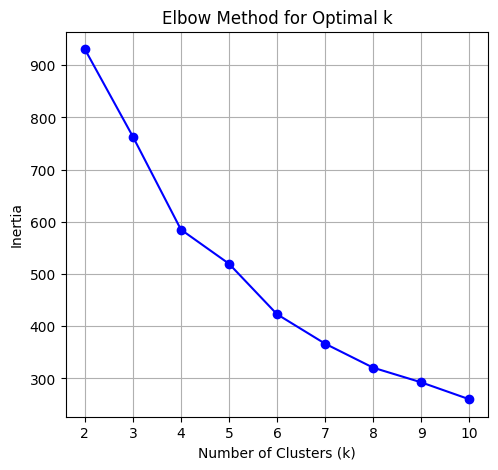

In [37]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(cluster_range, inertia, marker='o', color='blue')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid()

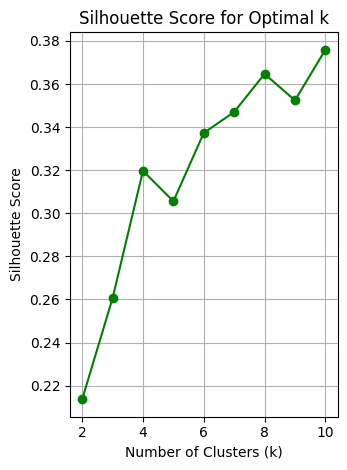

In [38]:
plt.subplot(1, 2, 2)
plt.plot(cluster_range, silhouette_scores, marker='o', color='green')
plt.title('Silhouette Score for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid()

plt.tight_layout()
plt.show()

In [39]:
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
customer_features['Cluster'] = kmeans.fit_predict(customer_features_scaled)
db_index = davies_bouldin_score(customer_features_scaled, customer_features['Cluster'])
silhouette_avg = silhouette_score(customer_features_scaled, customer_features['Cluster'])


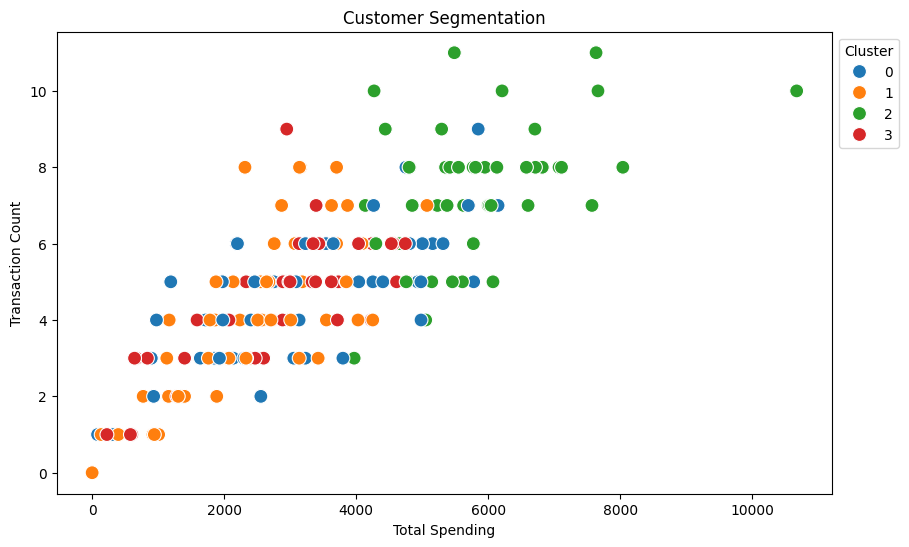

In [40]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TotalSpending', y='TransactionCount',hue='Cluster', palette='tab10', data=customer_features.reset_index(), s=100)
plt.title('Customer Segmentation')
plt.xlabel('Total Spending')
plt.ylabel('Transaction Count')
plt.legend(title='Cluster', bbox_to_anchor=(1, 1))
plt.show()

In [41]:
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=customer_features.columns[:-1]) 
print("Cluster Centers:\n", cluster_centers)
print(f"Number of clusters formed: {optimal_k}")
print(f"Davies-Bouldin Index: {db_index}")
print(f"Silhouette Score: {silhouette_avg}")

Cluster Centers:
    TotalSpending  TransactionCount  AvgTransactionValue  Region_Europe  \
0      -0.149395         -0.193412             0.018976       1.732051   
1      -0.532617         -0.430780            -0.218270      -0.577350   
2       1.319219          1.117978             0.559817      -0.524864   
3      -0.379818         -0.275179            -0.272097      -0.577350   

   Region_North America  Region_South America  
0             -0.546536             -0.646869  
1              0.857607             -0.646869  
2             -0.168497              0.250176  
3             -0.546536              1.545908  
Number of clusters formed: 4
Davies-Bouldin Index: 1.1926430643192665
Silhouette Score: 0.31973356884457993
